## Hecho por : Johan Suarez y Kalia Gonzalez

Ejercicio1: Newton Rapson 2D

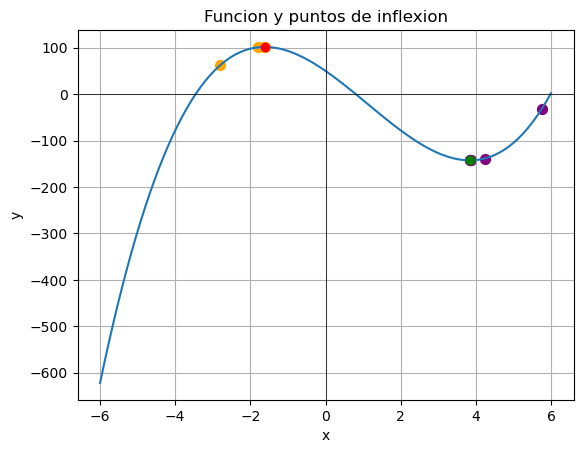

In [1]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt

#Definiremos la funcion usando sympy 
x = sp.symbols('x') 
#Creamos la funcion 
funcion = 3*x**3-10*x**2-56*x+50  
#Primera derivada 
derivada = sp.diff(funcion,x) 
#Segunda derivada 
derivada2 = sp.diff(derivada,x) 

#Formula Newton-Raphson 
#Entran como parametros el valor inicial y la tolerancia
def Newton_Raphson(x0,a): 
    lista = [] 
    i = 1 
    xi = x0 
    convergencia = 0.001 
    while abs(derivada.subs(x,xi) ) > convergencia:
        xi1 = xi - a*(derivada.subs(x,xi)/derivada2.subs(x,xi)) 
        lista.append(xi1) 
        xi=xi1 
    return xi,lista 

#Usamoa dos valores iniciales para x 
x0 = 0
x1 = 2 
#Usamos la funcion de Newton-Raphson para encontrar minimos y maximos 
inflection1 , x_list0 = Newton_Raphson(x0,1) 
inflection2 , x_list1 = Newton_Raphson(x1,1)
#Graficamos la funcion
funcionNumerica = sp.lambdify(x,funcion,'numpy') 
#Generamos valores de x y y
valores_x = np.linspace(-6,6,100) 
valores_y = funcionNumerica(valores_x) 

plt.plot(valores_x,valores_y) 
#Graficar punts de inflexion 
inflection1 = float(inflection1) 
inflection2 = float(inflection2) 
inflection1_y = funcionNumerica(inflection1) 
inflection2_y = funcionNumerica(inflection2)

plt.scatter(inflection1,inflection1_y,c='red', zorder=5, label='Maximo') 
plt.scatter(inflection2,inflection2_y,c='green', zorder=5, label='Minimo') 

#Mostrar iteracion del metodo de Newton-Raphson 
x_list0 = np.array(x_list0, dtype=float) 
x_list1 = np.array(x_list1, dtype=float) 
y_list0 = funcionNumerica(x_list0)  
y_list1 = funcionNumerica(x_list1) 


plt.scatter(x_list0,y_list0,s = 50,c='orange') 
plt.scatter(x_list1,y_list1,s = 50,c='purple') 


#Hcaemos grafica del plano 
plt.axhline(0,color='black', linewidth=0.5) 
plt.axvline(0,color='black', linewidth=0.5) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Funcion y puntos de inflexion') 
plt.grid(True) 
plt.show()



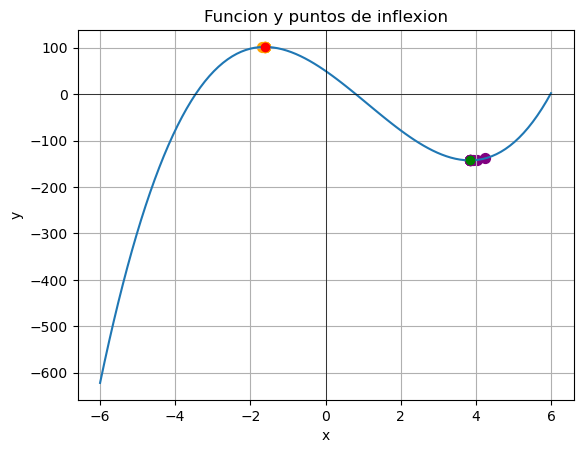

In [10]:
#Ahora, hacemos el mismpo proceso pero con un valor de 0,6 para la tolerancia 
#Usamoa dos valores iniciales para x 
x0 = 0
x1 = 2 
#Usamos la funcion de Newton-Raphson para encontrar minimos y maximos 
inflection1 , x_list0 = Newton_Raphson(x0,0.6) 
inflection2 , x_list1 = Newton_Raphson(x1,0.6)
#Graficamos la funcion
funcionNumerica = sp.lambdify(x,funcion,'numpy') 
#Generamos valores de x y y
valores_x = np.linspace(-6,6,100) 
valores_y = funcionNumerica(valores_x) 

plt.plot(valores_x,valores_y) 
#Graficar punts de inflexion 
inflection1 = float(inflection1) 
inflection2 = float(inflection2) 
inflection1_y = funcionNumerica(inflection1) 
inflection2_y = funcionNumerica(inflection2)

plt.scatter(inflection1,inflection1_y,c='red', zorder=5, label='Maximo') 
plt.scatter(inflection2,inflection2_y,c='green', zorder=5, label='Minimo') 

#Mostrar iteracion del metodo de Newton-Raphson 
x_list0 = np.array(x_list0, dtype=float) 
x_list1 = np.array(x_list1, dtype=float) 
y_list0 = funcionNumerica(x_list0)  
y_list1 = funcionNumerica(x_list1) 


plt.scatter(x_list0,y_list0,s = 50,c='orange') 
plt.scatter(x_list1,y_list1,s = 50,c='purple') 


#Hcaemos grafica del plano 
plt.axhline(0,color='black', linewidth=0.5) 
plt.axvline(0,color='black', linewidth=0.5) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Funcion y puntos de inflexion') 
plt.grid(True) 
plt.show()


Ejercicio 3: Newton Rapshon Multidimensional

El mínimo se encuentra en: (1.0000000000000187, 1.0000000000000375) con valor de la función: 3.5281803986009753e-28


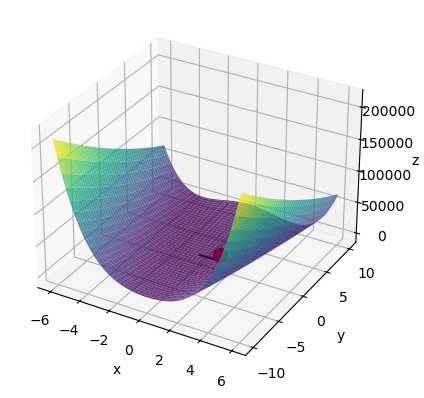

In [4]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt 

#Definimos la funcion usando sympy 
x,y = sp.symbols('x y') 
#Creamos la funcion 
funcion = (x-1)**2 + 100*(y-x**2)**2 
#Calculamos el gradiente 
gradiente = [sp.diff(funcion,var) for var in (x,y)] 
hessiana = sp.Matrix([[sp.diff(g,var) for var in (x,y)] for g in gradiente]) 

#Usamos lambdify para convertir la funcion en una funcion numerica 
gradiente_funcion = sp.lambdify((x,y),gradiente,'numpy') 
hessiana_funcion = sp.lambdify((x,y),hessiana,'numpy') 

#Aplicamos el metodo de Newton-Raphson 
def Newton_Raphson_Multidimensional(x0, y0 , alpha = 1, tole = 1e-6, maxIteraciones = 100):
    x_lista = [] 
    xi,yi = x0,y0 
    for i in range (maxIteraciones): 
        valor_gradiente = np.array(gradiente_funcion(xi,yi),dtype=float) 
        valor_hessiana = np.array(hessiana_funcion(xi,yi),dtype=float) 
        delta = np.linalg.solve(valor_hessiana,-valor_gradiente) 
        xi,yi = xi + alpha*delta[0], yi + alpha*delta[1]
        x_lista.append((xi,yi)) 
        if np.linalg.norm(delta) < tole: 
            break 
    return xi,yi,x_lista
#Utilizamos puntos iniciales 
xMin, yMin, lista = Newton_Raphson_Multidimensional(0,10)  
#Ponemos los valores de x y y en la funcion 
valores_x = np.linspace(-6,6,100) 
valores_y = np.linspace(-10,10,100)  
x_mesh, y_mesh = np.meshgrid(valores_x, valores_y) 

#Calculamos los valores de la funcion 
z_funcion = sp.lambdify((x,y),funcion,'numpy') 
z_mesh = z_funcion(x_mesh,y_mesh) 

#Graficamos la funcion 
figura = plt.figure() 
ax = figura.add_subplot(111,projection='3d') 
ax.plot_surface(x_mesh,y_mesh,z_mesh,cmap='viridis', alpha = 0.8) 
ax.scatter(xMin,yMin,z_funcion(xMin,yMin),c='red',s=100) 

#Graficamos la trayectoria 
x_lista = [p[0] for p in lista]
y_lista = [p[1] for p in lista] 
z_lista = [z_funcion(p[0],p[1]) for p in lista] 
ax.plot(x_lista,y_lista,z_lista,c='black') 
#oimprimir coordenadas 
print(f'El mínimo se encuentra en: ({xMin}, {yMin}) con valor de la función: {z_funcion(xMin, yMin)}')
#Ejes 
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z') 
plt.show()

  
    


Funcion en 4D

En esta seccion, se realizara la segunda parte del punto 3

El mínimo se encuentra en: (1.0, 2.0, 3.0) con valor de la función: 0.0


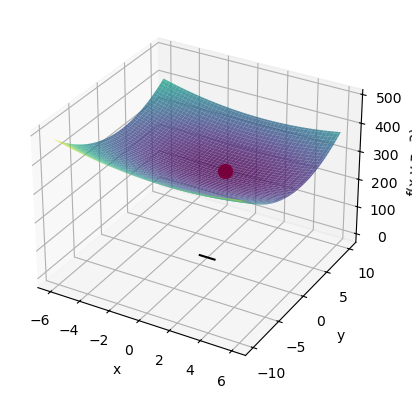

In [5]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt 
#Definimos la funcion usando sympy 
x,y,z = sp.symbols('x y z') 
#Creamos la funcion 
funcion = (x-1)**2 + (y-2)**2 + (z-3)**2 
#Calculamos el gradiente 
gradiente = [sp.diff(funcion,var) for var in (x,y,z)] 
hessiana = sp.Matrix([[sp.diff(g,var) for var in (x,y,z)] for g in gradiente]) 
#Usamos lambdify para convertir la funcion en una funcion numerica 
gradiente_funcion = sp.lambdify((x,y,z),gradiente,'numpy') 
hessiana_funcion = sp.lambdify((x,y,z),hessiana,'numpy') 
#Aplicamos el metodo de Newton-Raphson 
def Newton_Raphson_Multidimensional(x0, y0, z0, alpha = 1, tole = 1e-6, maxIteraciones = 100):
    x_lista = [] 
    xi,yi,zi = x0,y0,z0 
    for i in range (maxIteraciones): 
        valor_gradiente = np.array(gradiente_funcion(xi,yi,zi),dtype=float) 
        valor_hessiana = np.array(hessiana_funcion(xi,yi,zi),dtype=float) 
        delta = np.linalg.solve(valor_hessiana,-valor_gradiente) 
        xi,yi,zi = xi + alpha*delta[0], yi + alpha*delta[1], zi + alpha*delta[2]
        x_lista.append((xi,yi,zi)) 
        if np.linalg.norm(delta) < tole: 
            break 
    return xi,yi,zi,x_lista 
#Utilizamos puntos iniciales 
xMin, yMin, zMin, lista = Newton_Raphson_Multidimensional(0,10,20) 
#Ponemos los valores de x y y en la funcion  
valores_x = np.linspace(-6,6,100) 
valores_y = np.linspace(-10,10,100) 
valores_z = np.linspace(-20,20,100)
x_mesh, y_mesh = np.meshgrid(valores_x, valores_y) 
z_fijo = 20 
#Calculamos los valores de la funcion
w_funcion = sp.lambdify((x,y,z),funcion,'numpy') 
w_mesh = w_funcion(x_mesh,y_mesh,z_fijo) 
#Graficamos la funcion 
figura = plt.figure() 
ax = figura.add_subplot(111,projection='3d') 
ax.plot_surface(x_mesh,y_mesh,w_mesh,cmap='viridis', alpha = 0.8) 
ax.scatter(xMin,yMin,w_funcion(xMin,yMin,z_fijo),c='red',s=100) 
#Graficamos la trayectoria 
x_lista = [p[0] for p in lista] 
y_lista = [p[1] for p in lista] 
z_lista = [p[2] for p in lista] 
w_lista = [w_funcion(p[0],p[1],p[2]) for p in lista] 
ax.plot(x_lista,y_lista,z_lista,w_lista,c='black') 
#Imprimir coordenadas
print(f'El mínimo se encuentra en: ({xMin}, {yMin}, {zMin}) con valor de la función: {w_funcion(xMin, yMin, zMin)}') 
#Ejes 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_zlabel('f(x,y,z=3)') 
plt.show() 

